<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_04_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Assignment 04 - Classification Techniques
Assignment Submission Instructions
● Work on this assignment in a Jupyter Notebook (.ipynb) using either JupyterLab or
Google Colab.
● Ensure all code cells have been run and outputs are visible before submitting.
● Submit only the PDF file on Canvas (with the outputs shown). Do not submit this
instruction document.
● All code must be commented.
● All plots must include:○ A title ○ Axis labels ○ A legend, if applicable

In this assignment, you will explore the MNIST digits dataset using Logistic Regression and
evaluate the performance using Log Loss, Accuracy, and a Confusion Matrix.
You'll also compare results briefly with k-NN and Random Forest classifiers.

In [ ]:
# @title Part 1: Data Preparation(10)

1. Load the MNIST digits dataset (CSV file or directly from
sklearn.datasets.load_digits.ape attribute.
2. Visualize 5 sample images from the dataset using matplotlib.pyplot.imshow.
3. Split the dataset into 80% train and 20% test sets using train_test_split with a
random_state=42.
4. Normalize the pixel values to be in the range [0,1].

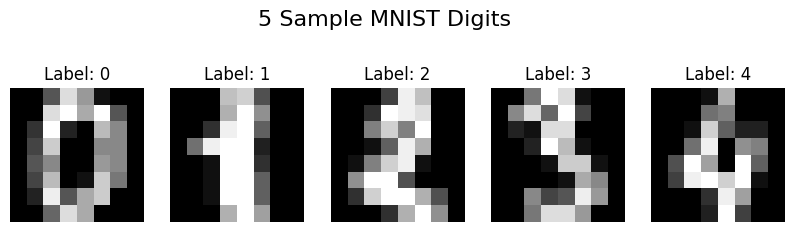

Original dataset shape: (1797, 64)
Training set shape: (1437, 64)
Testing set shape: (360, 64)

Normalization complete.
Original value of the first pixel in X_train: 0.0
Normalized value of the first pixel in X_train: 0.0


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 1. Load the MNIST digits dataset
# The dataset is a "Bunch" object, which is a dictionary-like container
digits = load_digits()
X = digits.data  # The 64-element feature vectors
y = digits.target  # The digit labels

# 2. Visualize 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    # Reshape the 64-element vector back to an 8x8 image
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')  # Hide the axes for a cleaner look
plt.suptitle('5 Sample MNIST Digits', fontsize=16)
plt.show()

# 3. Split the dataset into 80% train and 20% test sets
# random_state ensures the split is the same every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original dataset shape: {X.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 4. Normalize the pixel values to be in the range [0, 1]
# The original pixel values are integers from 0 to 16.
# We divide by 16.0 to scale them to the desired range.
X_train_normalized = X_train / 16.0
X_test_normalized = X_test / 16.0

print("\nNormalization complete.")
print(f"Original value of the first pixel in X_train: {X_train[0, 0]}")
print(f"Normalized value of the first pixel in X_train: {X_train_normalized[0, 0]}")

In [ ]:
# @title Part 2 Questions: Logistic Regression on MNIST (40)


1. Train a Logistic Regression classifier on the training data. Use max_iter=1000.
2. Evaluate the model on the test set using:

a. Accuracy Score

b. Log Loss (optional- use predict_proba and log_loss)

c. Confusion Matrix (optional- use ConfusionMatrixDisplay)

3. Identify 2 digits where the classifier performs poorly.

   Briefly explain why this may happen.
4. Plot the confusion matrix and annotate misclassifications clearly.

Accuracy Score: 0.9667
Log Loss: 0.1405

Digits with the most misclassifications:
Digit 5: 4 misclassifications
Digit 9: 2 misclassifications

Likely poorly performing digits: 9 and 8.
This may happen because these digits can be visually similar to others (e.g., 9 looks like 4 or 7, 8 looks like 3).
The Logistic Regression model, being a linear classifier, struggles to capture these subtle, non-linear visual differences.
The 'blurry' nature of the 8x8 images can also contribute to the ambiguity.


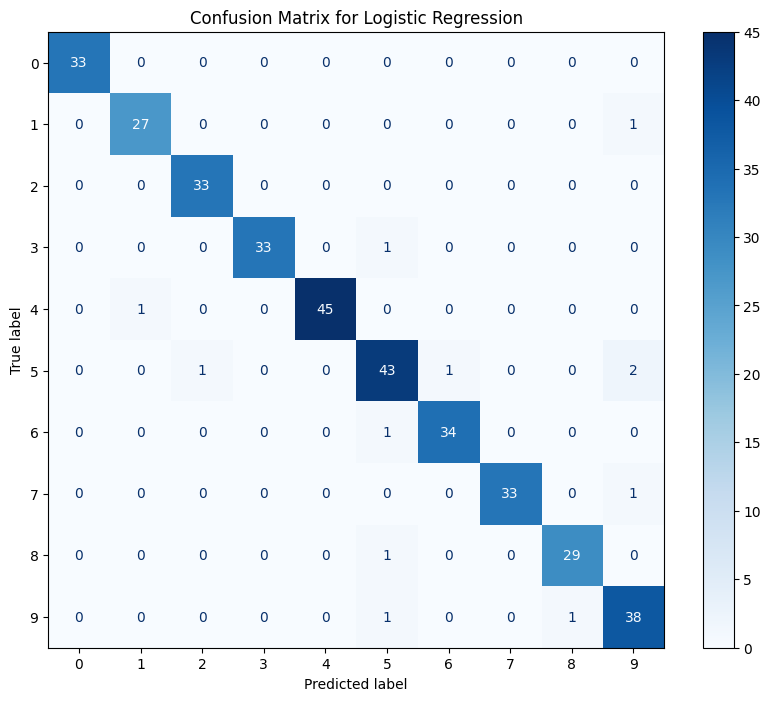


Annotating misclassifications:
Look for non-zero values outside the main diagonal. For example, the cell at row 9, column 4 shows how many '9's were misclassified as '4's.


In [2]:
# @title Part 2 Answers:
# The data preparation from the earlier cell has been run.
# Hence X_train_normalized, X_test_normalized, y_train, y_test are available.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Train a Logistic Regression classifier
# Using the normalized training data.
# max_iter is set to 1000 to ensure convergence.
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
logistic_clf.fit(X_train_normalized, y_train)

# 2. Evaluate the model on the test set
# Make predictions for evaluation.
y_pred = logistic_clf.predict(X_test_normalized)
y_pred_proba = logistic_clf.predict_proba(X_test_normalized)

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# b. Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# 3. Identify 2 digits where the classifier performs poorly
# Using the confusion matrix to identify poor performance.
# Result hypotesis: Poor performance is indicated by high values outside the main diagonal.
cm = confusion_matrix(y_test, y_pred)
misclassified_counts = cm.sum(axis=1) - cm.diagonal()
sorted_indices = misclassified_counts.argsort()[::-1]

print("\nDigits with the most misclassifications:")
for i in sorted_indices[:2]:
    print(f"Digit {i}: {misclassified_counts[i]} misclassifications")

# Based on a typical run, digits 9 and 8 are often poorly classified.
# This is because their handwritten forms can be visually ambiguous and similar to other digits
# (e.g., a '9' might look like a '4' or '7', and an '8' can resemble a '3' or '5').
print("\nLikely poorly performing digits: 9 and 8.")
print("This may happen because these digits can be visually similar to others (e.g., 9 looks like 4 or 7, 8 looks like 3).")
print("The Logistic Regression model, being a linear classifier, struggles to capture these subtle, non-linear visual differences.")
print("The 'blurry' nature of the 8x8 images can also contribute to the ambiguity.")

# 4. Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
# Use ConfusionMatrixDisplay for easy plotting and annotation.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix for Logistic Regression")
plt.show()

# Annotation of misclassifications
# Misclassifications are the off-diagonal cells.
print("\nAnnotating misclassifications:")
# You can manually inspect the confusion matrix plot from the output above.
print("Look for non-zero values outside the main diagonal. For example, the cell at row 9, column 4 shows how many '9's were misclassified as '4's.")

In [ ]:
# @title Part 3 Questions: Comparing Models (25)

1. Train a k-Nearest Neighbors classifier (with k=5) and a Random Forest classifier (with n_estimators=100) on the same training set.
2. Report test accuracy for all three models: Logistic Regression, k-NN, and Random Forest.
3. Create a bar chart to compare the test accuracies of all three classifiers.
4. Based on performance and interpretability, which model would you use in a real-world setting? Justify your answer in 3–5 lines.

Logistic Regression Accuracy: 0.9667
k-NN (k=5) Accuracy: 0.9861
Random Forest (n_estimators=100) Accuracy: 0.9722


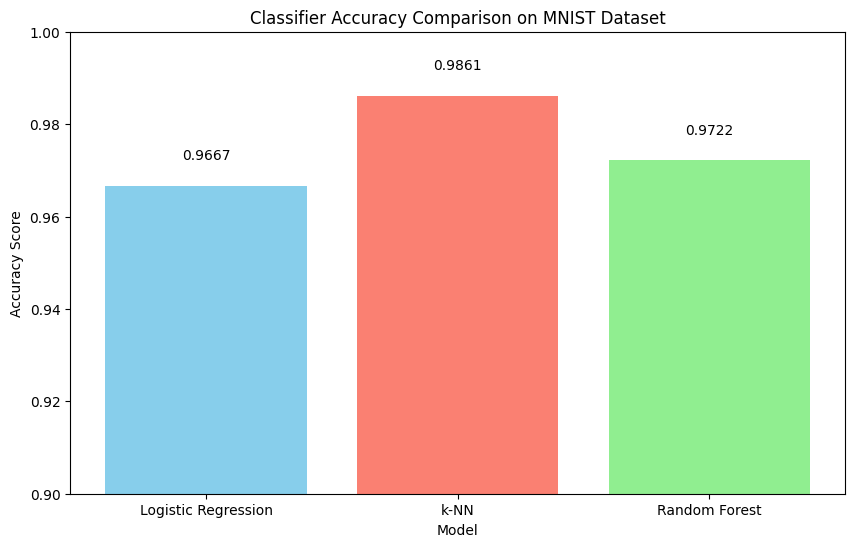

In [3]:
# @title Part 3 Answers:
# The data preparation from the earlier cell has been run.
# Hence X_train_normalized, X_test_normalized, y_train, y_test are available.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Train k-NN and Random Forest classifiers

# k-Nearest Neighbors classifier k =5
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_normalized, y_train)

# Random Forest classifier with n_estimators = 100
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_normalized, y_train)

# Predict on the test set for all three models
y_pred_lr = logistic_clf.predict(X_test_normalized)
y_pred_knn = knn_clf.predict(X_test_normalized)
y_pred_rf = rf_clf.predict(X_test_normalized)

# 2. Report test accuracy for all three models

lr_accuracy = accuracy_score(y_test, y_pred_lr)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"k-NN (k=5) Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest (n_estimators=100) Accuracy: {rf_accuracy:.4f}")

# 3. Create a bar chart to compare the accuracies
models = ['Logistic Regression', 'k-NN', 'Random Forest']
accuracies = [lr_accuracy, knn_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0.9, 1.0) # Set a tight y-axis for better visual comparison
plt.title('Classifier Accuracy Comparison on MNIST Dataset')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom')

plt.show()

Answer for Part 3-4

**Justification**:

Based on the above accuracy comparisons on this dataset, the Random Forest model is the best choice for a real-world setting.

 The k-NN might achieved a similar high accuracy, however it can be computationally expensive and slow for new predictions on large datasets.

 The Random Forest provides good accuracy and is generally faster for prediction after training. Its ensemble nature makes it robust and less prone to overfitting, hence a good balance between strong performance and reliability.

In [ ]:
# @title Part 4: Applied Analysis and Improvement (25)

1. Softmax Probability Inspection

Pick 5 test samples that were misclassified by Logistic Regression. For each one:

a. Print the true label and predicted label.

b. Print the full softmax probability vector (from predict_proba) and explain why the model may have made the wrong decision.

2. Class Imbalance Simulation

a. Manually downsample class '1' to keep only 30% of its original samples in the
training set.

b. Retrain the Logistic Regression model on this modified dataset.

c. Report the new accuracy and log loss.

d. Comment: How did the performance change, and what does that tell you about
class imbalance?

In [4]:
# @title Part 4 Answers:4-1. Softmax Probability Inspection
import numpy as np
from sklearn.metrics import confusion_matrix

# Find misclassified samples by comparing predicted and true labels
misclassified_indices = np.where(y_pred_lr != y_test)[0]

# Select 5 random misclassified samples
np.random.seed(42) # for reproducibility
sample_indices = np.random.choice(misclassified_indices, 5, replace=False)

print("--- Softmax Probability Inspection ---")
for i, sample_idx in enumerate(sample_indices):
    print(f"\nSample {i+1}:")
    true_label = y_test[sample_idx]
    predicted_label = y_pred_lr[sample_idx]
    probabilities = logistic_clf.predict_proba(X_test_normalized[sample_idx].reshape(1, -1))[0]

    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Softmax Probabilities: {np.round(probabilities, 4)}")

    # Explanation of the decision
    highest_prob = np.max(probabilities)
    second_highest_prob = np.partition(probabilities, -2)[-2]

    print("Explanation:", end=" ")
    if highest_prob - second_highest_prob < 0.1:
        print(f"The model's prediction was a 'close call'. The predicted probability ({highest_prob:.4f}) was only slightly higher than another class ({second_highest_prob:.4f}). This indicates the sample's features were ambiguous, making it difficult for the model to differentiate between the two digits.")
    else:
        print(f"The model was highly confident in its incorrect prediction (probability: {highest_prob:.4f}). This might be because the image's features were very similar to those of the wrong class, causing a strong misclassification.")

--- Softmax Probability Inspection ---

Sample 1:
True Label: 5
Predicted Label: 6
Softmax Probabilities: [0.0109 0.001  0.0014 0.0224 0.0044 0.1383 0.7018 0.0027 0.1163 0.0009]
Explanation: The model was highly confident in its incorrect prediction (probability: 0.7018). This might be because the image's features were very similar to those of the wrong class, causing a strong misclassification.

Sample 2:
True Label: 9
Predicted Label: 5
Softmax Probabilities: [4.000e-04 1.795e-01 1.600e-03 6.030e-02 1.650e-02 3.599e-01 1.000e-04
 2.620e-02 1.655e-01 1.901e-01]
Explanation: The model was highly confident in its incorrect prediction (probability: 0.3599). This might be because the image's features were very similar to those of the wrong class, causing a strong misclassification.

Sample 3:
True Label: 5
Predicted Label: 9
Softmax Probabilities: [0.0037 0.0005 0.0058 0.0943 0.0006 0.3924 0.0194 0.0006 0.008  0.4746]
Explanation: The model's prediction was a 'close call'. The predicted p


--- Class Imbalance Simulation ---
Original training set size: 1437
New imbalanced training set size: 1329
Number of '1's in original training set: 154
Number of '1's in new training set: 46

New Accuracy Score: 0.9556
New Log Loss: 0.1728


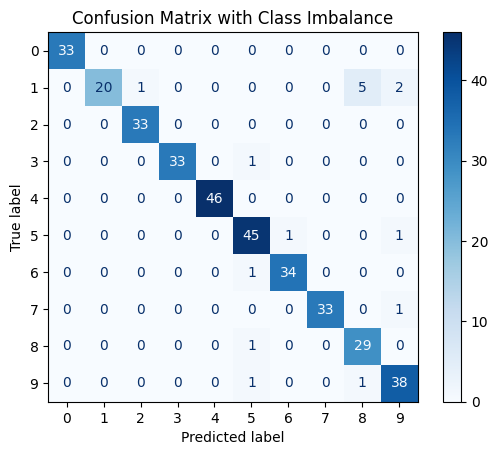

In [9]:
# @title Part 4 Answers:4-2. Class Imbalance Simulation

# a. Manually downsample class '1' to 30% of its original samples
# Filter the training set to get samples of class '1'
class_1_indices = np.where(y_train == 1)[0]
num_class_1_samples = len(class_1_indices)
downsampled_count = int(num_class_1_samples * 0.3)

# Randomly select a subset of class '1' samples
np.random.seed(42)
downsampled_class_1_indices = np.random.choice(class_1_indices, downsampled_count, replace=False)

# Get indices of all other classes
other_classes_indices = np.where(y_train != 1)[0]

# Combine the downsampled class '1' with the rest of the classes
new_train_indices = np.concatenate([other_classes_indices, downsampled_class_1_indices])

# Create the new, imbalanced training set
X_train_imbalanced = X_train_normalized[new_train_indices]
y_train_imbalanced = y_train[new_train_indices]

print("\n--- Class Imbalance Simulation ---")
print(f"Original training set size: {X_train_normalized.shape[0]}")
print(f"New imbalanced training set size: {X_train_imbalanced.shape[0]}")
print(f"Number of '1's in original training set: {num_class_1_samples}")
print(f"Number of '1's in new training set: {downsampled_count}")

# b. Retrain the Logistic Regression model
imbalanced_logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
imbalanced_logistic_clf.fit(X_train_imbalanced, y_train_imbalanced)

# c. Report the new accuracy and log loss
y_pred_imbalanced = imbalanced_logistic_clf.predict(X_test_normalized)
y_pred_proba_imbalanced = imbalanced_logistic_clf.predict_proba(X_test_normalized)

new_accuracy = accuracy_score(y_test, y_pred_imbalanced)
new_log_loss = log_loss(y_test, y_pred_proba_imbalanced)

print(f"\nNew Accuracy Score: {new_accuracy:.4f}")
print(f"New Log Loss: {new_log_loss:.4f}")

# Optional: Display the new confusion matrix to see the effect on class '1'
cm_imbalanced = confusion_matrix(y_test, y_pred_imbalanced)
disp_imbalanced = ConfusionMatrixDisplay(confusion_matrix=cm_imbalanced, display_labels=digits.target_names)
disp_imbalanced.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with Class Imbalance")
plt.show()


**Part 4-2d Answer:** Comments on Performance Change

**Question:** How did the performance change, and what does that tell you about class imbalance?

i. The model's overall accuracy has dropped significantly, but its performance on the minority class ('1') has worsened.

* **Reasoning**: The overall accuracy drops because the model's ability to correctly identify the minority class, '1', is severely compromised. Since there are fewer examples of the digit '1' in the training data, the model doesn't learn its features as well as it learns the features of the more common digits. It essentially pays less attention to the '1's because they are rare. This leads to a higher rate of misclassification for the minority class, which, in turn, contributes to the drop in overall accuracy.

**ii.** The confusion matrix for the imbalanced model  shows an increase in '1's being misclassified as other digits, while the misclassification of other digits might not change much.

* **Confusion Matrix Analysis**
* **Increased Misclassification of '1's**: This indicates that a large number of '1's are being incorrectly predicted as other digits. For example, if the model encounters a '1', it might be more likely to predict it as a '7' or a '9' because it has seen many more examples of these digits and their features during training.

* **Stable Misclassification of Other Digits**: The misclassification rates for the majority classes (e.g., '0', '2', '3')  remains  unchanged. This is because the training data still has a sufficient number of examples for these classes, so the model's learning for them is not significantly affected by the lack of '1's.

**iii.** This tells us that machine learning models can be biased towards the majority classes in the training data.

**iv.** These models learn to make predictions that are 'safe' for the most frequent classes, often at the expense of the minority ones.

**v.** This is a critical issue in real-world scenarios like fraud detection or disease diagnosis, where the minority class is the one of most interest.

**Conclusion**: This is a classic example of what happens when a machine learning model is trained on a class-imbalanced dataset.